In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [2]:
# Seed
np.random.seed(101)

In [3]:
# HyperParameters
num_features = 2
num_clusters = 4
num_points = 150

In [4]:
# Generate data
x, y_true = make_blobs(n_samples=num_points, n_features=num_features, centers=num_clusters)

Text(0, 0.5, 'x2')

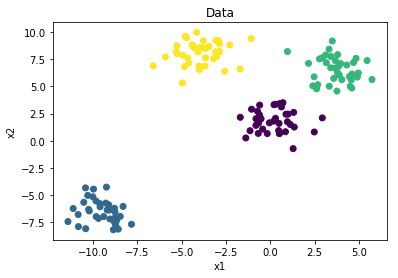

In [5]:
# Plot data
plt.scatter(x[:,0], x[:,1],c=y_true)
# Title
plt.title('Data')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')

In [6]:
# Add empty column to data
new_points = np.hstack((x, np.zeros((len(x),1))))

In [7]:
# Color for clusters
clusters_colors = ['b', 'g', 'r', 'c', 'm', 'y' ,'k']
# Take only as many colors as there are classes
clusters_colors = clusters_colors[:num_clusters]

In [8]:
# Function to compute distance
def distance(clusters, points):
    # Empty list for distances
    distances = np.empty((num_clusters,1))
    for i in range(len(points)):
        for n in range(num_clusters):
            # Distance between each points and clusters
            distances[n] = np.linalg.norm(clusters[n]-points[i,:-1])
        # Nearest cluster
        near_cluster = np.argmin(distances)
        # New column to points data
        points[i,-1] = near_cluster
    return points

In [9]:
# Function to color points
def color_points(points):
    points_colors = []
    for i in range(len(points)):
        points_colors.append(clusters_colors[int(points[i,-1])])
    return points_colors

In [10]:
# Function to move centroids
def move_centroid(clusters_pos , points):
    for n in range(num_clusters):
        # Points belonging to current cluster
        selected_points = [point[:-1] for point in points if n == point[-1]]
        if selected_points:
            # New cluster position
            clusters_pos[n] = np.mean(selected_points, axis=0)
    return clusters_pos

In [11]:
# Function to compute errors (similar as distance's function)
def error_func(clusters, points):
    errors = np.empty((num_clusters))
    for n in range(num_clusters):
        # Distance between cluster and its points
        distances = [np.linalg.norm(clusters[n]-point[:-1]) for point in points if n == point[-1]]
        errors[n] = np.sum(distances)
    return np.sum(errors)

In [12]:
# Minimal error
min_error = float(np.inf)

# Train algorithm 10 times and choose the best result
for i in range(10):
    # Initialize clusters randomly
    clusters = np.random.uniform(x.min(), x.max(), size=(num_clusters,num_features))
    # Training loop
    for epoch in range(100):
        # Distances
        points = distance(clusters, new_points)
        # Color points
        points_colors = color_points(points)
        # Move centroids
        clusters = move_centroid(clusters, new_points)
    # Error
    error = error_func(clusters, new_points)
    # If error < min_error save result
    if error < min_error:
        min_error = error
        save_clusters = clusters
    print('Error:', error)

Error: 386.5001555565909
Error: 329.40029143785375
Error: 329.40029143785375
Error: 329.40029143785375
Error: 193.7446884617237
Error: 193.7446884617237
Error: 329.40029143785375
Error: 518.1649178471438
Error: 386.5001555565909
Error: 329.40029143785375


In [13]:
# Distances
points = distance(save_clusters, new_points)
# Color points
points_colors = color_points(points)

Text(0, 0.5, 'x2')

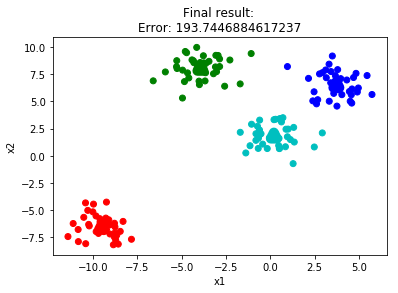

In [14]:
# Plot data
plt.scatter(new_points[:,0],new_points[:,1],c=points_colors)
# Plot clusters
plt.scatter(save_clusters[:,0], save_clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)
# Title
plt.title('Final result: \n' + 'Error: ' + str(min_error))
# Axes
plt.xlabel('x1')
plt.ylabel('x2')

# SKLEARN

In [15]:
from sklearn.cluster import KMeans

In [16]:
# Create KMeans model
km = KMeans(n_clusters=4)
# Train model
km.fit(new_points[:,:-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
# Distances
points = distance(km.cluster_centers_, new_points)
# Color points
points_colors = color_points(points)

Text(0, 0.5, 'x2')

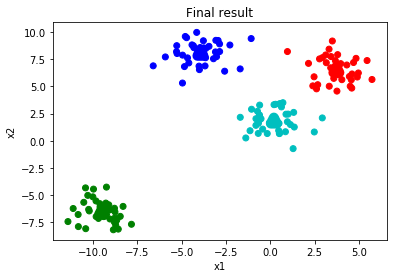

In [18]:
# Plot data
plt.scatter(new_points[:,0],new_points[:,1],c=points_colors)
# Plot clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = clusters_colors, marker = '^', linewidths = 10)
# Title
plt.title('Final result')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')